# Neural Networks and Deep Learning
- This will introduce basic concepts regarding neural networks and is by no-means comprehensive.  
- Neural networks can cover multiple full courses, so this only scratches the surface.  
- See the readings and resources section for resources for more information.

## Artificial Neural Networks (ANN)
- Introduced in 1943, based on the concept of biological neurons.  
- Generally used for image, speech, and text classification.  
- It can be used in similar cases as we've seen for other examples, though the performance is generally similar to other models we've talked about.
  
## Biological Neurons

<img src='files/diagrams/brain.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition Pg. 20](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch02/images)

- Built upon how the brain works to intake information, process and extrapolate it, and make decisions.  
- Neurons can make very complex decisions.  
- Artificial neurons perform various logical computations:

<img src='files/diagrams/neuron-logic.png' stype='width: 500px'>

- The brain uses `neurons`, but neural networks approximate this bahavior with `units` and `layers`.  
- Neural networks have been around since the 1940s, but have become more popular in the last 20 years, coinciding with advancements in computing.  
- The revolution really started in the 1980s, after a technique called backpropagation was developed, which makes deep neural networks much more efficient to compute.  

## The Potential
- Realistic potential in changing how humans live their lives:  
    - Self-driving cars. 
    - Universal language translaters.  
    - Semi-autonomous robots for manual/menial work.  
    - Vaccine development.  
    - "Metaverse"  
    - ...  
- Not quite there yet though...   
    - Intuition without hard data.  
    - Computing.  
    - Training data with labels.  
    - Ethical decisions.  

## Single Layer (aka `Logistic Regression`)
- Simpliest ANN architecture.  
- Input layer and output layer.  
- The activation function normalizes the output. Logistic regression uses a sigmoid function, but there are others that may be more robust for your neural network models.  
- Instead of coefficients we will call these weights.  
- The constant ($B_0$) is referred to as a `bias unit`.  

<img src='files/diagrams/singlelayer.png' style='width: 500px'>


[Image source Machine Learning with Python 3rd Edition Pg. 386](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- The logistic regression model we manually created in [Week 6](https://github.com/appliedecon/data602-lectures/tree/main/week06) is essentially a single-layer neural network that uses a sigmoid activation function.

We can think of this `single layer` as $y=f(x)$

## Hidden Layers
<img src='files/diagrams/multilayer.png' style='width: 600px'>


[Image source Machine Learning with Python 3rd Edition Pg. 388](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- Many different types of neural networks. This is a feedforward, fully connected network, also called a `Multi-layer Perceptron (MLP)`.  
- Think of these as nested functions, with a 3-layer specified as:
$$
y = f_{NN}(x)=f_3(f_2(f_1(x)))
$$

- Allows complex, non-linear, relationships to be learned. However, the non-linearity is approximated by a series of nested linear functions.    
- $a_0^{(in)}$ and $A_0^{(h)}$ are bias units, and will equal $1$.  
- The output of each unit gets passed into an activation function to normalize the output and allow for non-linear approximations.  
- If there was not an activation functions, chains of linear combinations will only result in a linear transformation and that wouldn't be able to capture complexities of higher-order problems, i.e., a deep network without activation functions would be the same as a single-layer network.  

Recall:
$$
y = f_{NN}(x)=f_3(f_2(f_1(x)))
$$

Individually these functions will be represented as:
$$
f_l(z)=g_l(W_{lz}+b_t)
$$

- $l$ is the layer
- $g_l$ is the activation function, which requires a matrix of weights, $W_l$, and a vector, $b_l$ for each layer. $g_l$ can be any of the functions detailed below.  
- Theoretically, a deep neural network can capture any continuous function when activation functions are used.  

Linear Activation (regression): 
$$
\phi(x) = z
$$

Sigmoid (logistic regression, ANN):
$$
\phi(z)=\frac{1}{1+e^{-z}}
$$

Hyperbolic tangent - tanh (ANN):
$$
\phi(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}
$$

ReLU (ANN):
$$
\phi(z)= \begin{cases}
    0, & \text{if}\ z<0\\
    z, & \text{if}\ z>0
    \end{cases}
$$

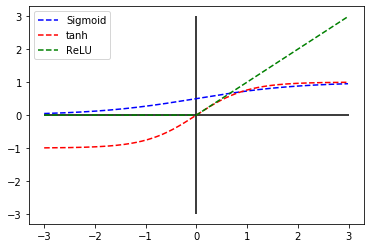

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.arange(-3.0, 3.0, 0.01)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def relu(z):
    return np.where(z<0, 0, z)
    
plt.plot(z, sigmoid(z), 'b--')
plt.plot(z, tanh(z), 'r--')
plt.plot(z, relu(z), 'g--')
plt.legend(['Sigmoid','tanh', 'ReLU'])
plt.hlines(0, -3, 3)
plt.vlines(0, -3, 3)
plt.show()

- Generally, `ReLu` is the default activation function that you should use, but it really could be treated `hyperparameter`. This is because its derivative is always 1 (derivative of a constant $=1$) for positive values so it addresses issues that arise from gradients that approach zero (`vanishing gradients`).  
- The output layer will have a unit per class, which generalizes the `one-versus-all` technique (below image is for a 3-class problem). For a binary class, this output layer would have only one unit.  

<img src='files/diagrams/12_03.png' style='width: 500px'>

[Image source Machine Learning with Python 3rd Edition Pg. 390](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)


- `Number of layers` and `number of units` are hyperparameters that will need to be tuned.  

#### The `hidden layers` can represent "concepts" or "features" that aren't explicitly in the data, but the network might discover a latent approximation.
You won't know what these are, but the neural net may infer them.

<img src='files/diagrams/housing_price.png' style='width: 600px'>

[Image source Andrew Ng](https://www.youtube.com/watch?v=n1l-9lIMW7E&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=3)

### Basic Process
- Start at input layer, propagate patterns of training data through to the output layer.  
- Calculate the error we want to minimize (cost function). Similar to how we implemented the gradient descent algorithm in the past.    
- **NEW** - Backpropagate error by finding its derivative to each weight and update the model. The below diagram illusrates backpropagation:  

<img src='files/diagrams/12_12-back.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition Pg. 421](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- See [numpy's examples](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) for a manual implementation of a neural network.  
- Typically use `mini-batch` for training - samples of the data during each weight update.  
- Training can be more complicated because there can be millions of weights that need to be trained with deep neural networks. Getting stuck in `local minimas` can be a problem.

<img src='files/diagrams/12_13-cost.png' style='width: 500px'>

[Image source Machine Learning with Python 3rd Edition Pg. 422](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)


### Implementations and Frameworks

- [scikit-learn has an implementation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) but it isn't intended for large-scale problem since scikit-learn doesn't have GPU support.  
- Most common packages/frameworks:  
    - [TensorFlow](https://www.tensorflow.org)  
    - [Keras](https://keras.io)  
    - [PyTorch](https://pytorch.org)  
    - [mxnet](https://mxnet.apache.org/versions/1.8.0/)  
- We'll show a simple examle using scikit learn's implementation, then focus on `keras`, since the APIs available are relatively simple compared to the other frameworks.    

### Tuning
Tuning can be very complicated for ANNs, especially for deep neural networks. Potential hyperparameters:
- Number of layers - additional layers instead of more units might be more effective.  
- Number of units.  
- Activation function `at each layer`.  
- Weight initialization (typically random, but can be anything).  
- Solver.  
- Batch size - if you have a GPU, use the largest batch than fits on the GPU for maximum performance.  
- Learning rate - arguably the most important.  
- Iterations.  
- Shape of deeper layers.  
- Convolutions and filters.  
- Wide and deep?  
- ...  

This is why it takes a lot of effort and compute to train certain models. Since there are so many potential levers for performance gains, usually `improvements` are released iteratively.

[A Disciplined Approach to Neural Network Hyper-Parameters](https://arxiv.org/abs/1803.09820)  
- No perfect way to go about looking for the best hyper-parameters.  
- Grid or Random search is an option, but computationally expensive.  
- Many cheat by using an existing model, e.g., AlexNet.  
- Best practices:
    - Look at the loss curves for clues about the suitability of the learning rate (under/over-fitting).  
    - Batch size is somewhat constrained by your computing environment (data $\le$ memory).  
    - Smaller batches add a little regularization.  

# Simple Implementation
[Based on Alex Trask's `Grokking Deep Learning`](https://github.com/iamtrask/Grokking-Deep-Learning)

**Learning with Gradient Descent**

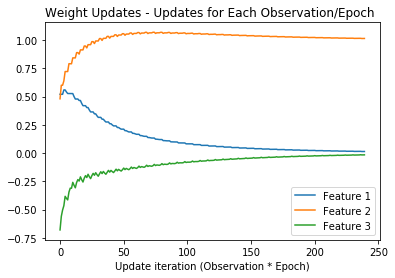

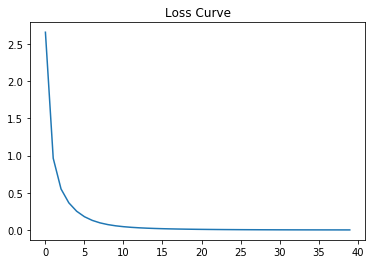

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# inital weights
weights = np.array([0.5,0.48,-0.7])

# learning rate
alpha = 0.1

# data on street lights
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

# target variable: cross the street or not
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

# starting points
input = streetlights[0]
goal_prediction = walk_vs_stop[0]

weights_ = list()
preds_   = list()
errors_  = list()

# gradient descent to learn weights with 40 iterations
for iteration in range(40):
    
    # initial error
    error_for_all_lights = 0
    
    # loop through rows
    for row_index in range(len(walk_vs_stop)):
        # each observation/epoch will update weights
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        # dot product of input and weights
        prediction = input.dot(weights)
        
        # error of prediction against observed
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        # gradient and weight update
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))

        weights_.append(weights)
        preds_.append(prediction)
        
    errors_.append(error_for_all_lights)
    
plt.plot(weights_)
plt.title('Weight Updates - Updates for Each Observation/Epoch', loc='left')
plt.legend(['Feature 1', 'Feature 2', 'Feature 3'])
plt.xlabel('Update iteration (Observation * Epoch)')
plt.show()

plt.plot(errors_)
plt.title('Loss Curve')
plt.show()

### Add Hidden Layers and Units
- 3 Features x 4 Hidden Units = 12 weights from first layer  
- 4 hidden units. 

> 16 weights for the below example!

In [3]:
import numpy as np

np.random.seed(1)

# activation function for each weight
def relu(x):
    return (x > 0) * x 

# output function
def relu2deriv(output):
    return output>0

# learning rate and number of hidden units
alpha = 0.2
hidden_size = 4

# training data
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

# labels
walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

# initial weights for layers
weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) - 1

# input layer, initial hidden layer, output layer
layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)

# epochs and storeage
epochs = 60
errors_ = list()

from collections import defaultdict
l2_1_weights_ = defaultdict(list)
l1_0_weights_ = defaultdict(list)

for iteration in range(epochs):

    # initial error
    layer_2_error = 0
    
    for i in range(len(streetlights)):
        # weights for each layer (input -> hidden -> output)
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        # errors
        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
        
        # error gradient
        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        # error gradient in hidden layer
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
        
        # update weights (output -> hidden, then hidden -> input, i.e., backwards)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
        errors_.append(layer_2_error)
        
        # store weight values
        for i in range(np.size(weights_1_2)):
            l2_1_weights_[i].append(weights_1_2[i][0])
        
        for i in range(np.size(weights_0_1)):   
            l1_0_weights_[i].append(weights_0_1.reshape(12,)[i])
            
print('Completed.')

Completed.


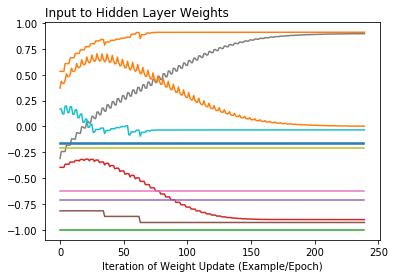

In [4]:
import pandas as pd

l0_1 = pd.DataFrame(l1_0_weights_)
l0_1.plot(legend=None)
plt.title('Input to Hidden Layer Weights', loc='left')
plt.xlabel('Iteration of Weight Update (Example/Epoch)')
plt.show()

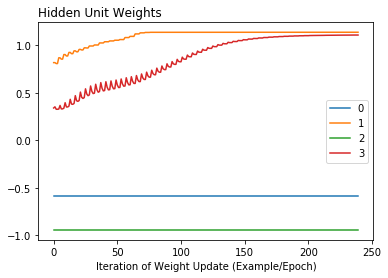

In [5]:
l2_1 = pd.DataFrame(l2_1_weights_)
l2_1.plot()
plt.title('Hidden Unit Weights', loc='left')
plt.xlabel('Iteration of Weight Update (Example/Epoch)')
plt.show()

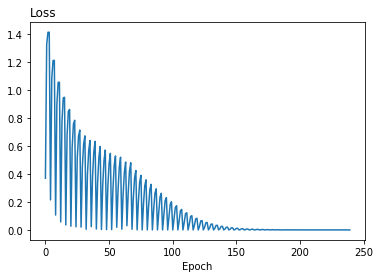

In [6]:
plt.plot(errors_)
plt.title('Loss', loc='left')
plt.xlabel('Epoch')
plt.show()

## Neural Networks with the MNIST Data
We'll baseline with a `logistic regression` so we understand what type of performance gain the neural network is providing us.

- 784 input neurons. 
- 10 output neurons (1 for each class).  
- 7,840 parameters to learn.  

In [7]:
from sklearn.datasets import fetch_openml
import datetime

st = datetime.datetime.now()

X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

en = datetime.datetime.now()
el = en - st

print(f'Fetch time: {el}')

X = X / 255.0

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Fetch time: 0:00:35.834334
Training examples: 60,000
Test examples: 10,000


### Logistic Regression
Let's get a baseline from a vanilla logistic regression model.

In [8]:
from sklearn.linear_model import LogisticRegression
import datetime

st = datetime.datetime.now()

lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train, y_train)

en = datetime.datetime.now()
el = en - st

print(f'Fit time: {el}')
print(f'Training set score: {lr.score(X_train, y_train):.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')

Fit time: 0:01:14.648211
Training set score: 92.79%
Test score: 92.03%


### [scikit-Learn Multi-layer Perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
Using the MNIST dataset, we'll train a neural net with `1-hidden layer` that contains `50-hidden units`.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=0,
    random_state=1,
    learning_rate_init=0.1,
)

mlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Training set score: {mlp.score(X_train, y_train):.2%}')
print(f'Test score: {mlp.score(X_test, y_test):.2%}')
print(f'\nTraining completed in {en-st}')

Training set score: 100.00%
Test score: 97.31%

Training completed in 0:01:06.696911


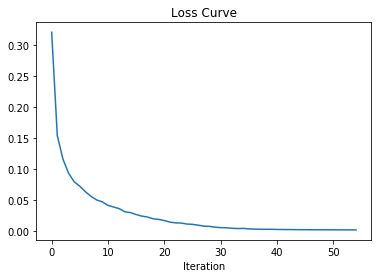

In [10]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.title('Loss Curve')
plt.show()

> Training stopped because the loss converged.

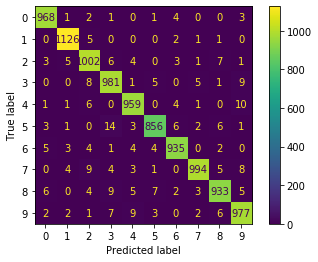

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()

### "Deep" Network on MNIST
- ANNs with more than 2 hidden layers are consider `deep` networks.  
- The example below will have 3 hidden layers, but it isn't uncommon for more complicated models to have hundreds of hidden layers, including ones that are more complicated than simple direct input/outputs.

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()
mlp = MLPClassifier(
    hidden_layer_sizes=(50,50,50),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=0,
    random_state=1,
    learning_rate_init=0.1
)

mlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Training completed in {en-st}')
print(f'Training set score: {mlp.score(X_train, y_train):.2%}')
print(f'Test score: {mlp.score(X_test, y_test):.2%}')

Iteration 1, loss = 0.34132625
Iteration 2, loss = 0.13385624
Iteration 3, loss = 0.10517005
Iteration 4, loss = 0.08661185
Iteration 5, loss = 0.07296673
Iteration 6, loss = 0.06607626
Iteration 7, loss = 0.05712624
Iteration 8, loss = 0.05096139
Iteration 9, loss = 0.04894500
Iteration 10, loss = 0.04172744
Iteration 11, loss = 0.03804725
Iteration 12, loss = 0.03688750
Iteration 13, loss = 0.03458147
Iteration 14, loss = 0.03590979
Iteration 15, loss = 0.03016864
Iteration 16, loss = 0.02681141
Iteration 17, loss = 0.03102717
Iteration 18, loss = 0.02399110
Iteration 19, loss = 0.02525154
Iteration 20, loss = 0.02813208
Iteration 21, loss = 0.02282548
Iteration 22, loss = 0.02251492
Iteration 23, loss = 0.01943094
Iteration 24, loss = 0.02049333
Iteration 25, loss = 0.02261149
Iteration 26, loss = 0.01836079
Iteration 27, loss = 0.02339591
Iteration 28, loss = 0.02292981
Iteration 29, loss = 0.02181654
Iteration 30, loss = 0.01809922
Iteration 31, loss = 0.01587740
Iteration 32, los

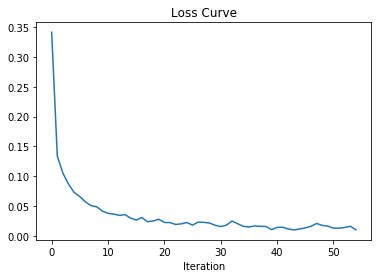

In [13]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.title('Loss Curve')
plt.show()

In [14]:
mlp.n_layers_

5

> `Input` + `Hidden Layer 1` + `Hidden Layer 2` + `Hidden Layer 3` + `Output Layer`

> The loss function is showing `a lot more roughness` here. Recall it has been smooth when we've looked at other models. If these gyrations where larger, it is possible the model could have gotten stuck in a local minima. The risk of that happening with deep neural networks is substantially larger than for the simpler models we have looked at previously.

- Training a model like this wasn't possible 35 years ago.

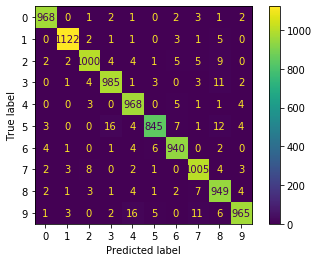

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()

> Single layer outperformed a multi-layer network. Deep isn't necessarily better - you need to grid search through the layers and units to determine the `best` values. In this case, a single 50-unit hidden layer performed about the same as two 50-unit hidden layers; so simple wins once again.

### Our `Deep Learning` Model Didn't Improve MNIST Performance
#### However, there's been significant progress on Deep Learning Models: 

<img src='files/diagrams/dnn-comparison.png'>

#### And Architectures Can be Complicated

<img src='files/diagrams/sample-dnn.png'>

[AlexNet](https://en.wikipedia.org/wiki/AlexNet)
<br>[VGG (Very Deep Convolutional Networks for Large-Scale Image Recognition)](https://arxiv.org/abs/1409.1556)
<br>[GoogleNet](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf)
> You can download pre-trained versions of these models.

#### Training Time
- Each model took about 1 minute to run.  
- Say we want to evaluate up to a 3-layer network.  
- We have no prior on the number of units so, we'd need to try several.  
- Grid could look like this:  
    - {'hidden_layer_sizes': (100,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75,), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50,), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100,), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75,), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50,), learning_rate = 0.001}.
    - {'hidden_layer_sizes': (100, 100,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75, 75, ), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50, 50, ), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100, 100, ), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75, 75, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50, 50, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (100, 75,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75, 50, ), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50, 25, ), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100, 75, ), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75, 50, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50, 25, ), learning_rate = 0.001}.  
    - ...

> Need to look to frameworks that allow for more efficient computation.

# [Keras](https://keras.io)
One of the more popular frameworks, that can scale to GPUs or TPUs, tl;dr it can run models fast (relatively speaking). Developed by `Francois Chollet`, who literally wrote the book on [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

Keras serves as a wrapper on [TensorFlow](https://www.tensorflow.org), but not all of TensorFlow's functionality is available in the Keras API.

GridSearch and Hyperparameter tuning can be done another package, [KerasTuner](https://keras.io/keras_tuner/).

### Simple Regression Example
- Similar to many of the models we've talked about, you can also use ANNs for regression problems.  
- Probably don't want to use activation functions for the outputs so the values are continuous and unbounded.  
- Loss is generally `mean squared error`, but another variant may be better dependent on your data, e.g., lots of outliers may warrant `mean absolute error` as a better choice.  
- Most regression problems will require 5 or fewer layers, with most requiring only 1 or 2.

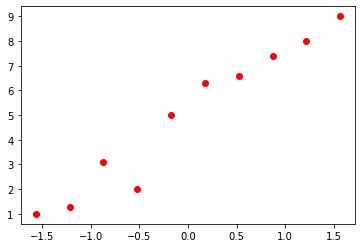

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

plt.plot(X_train_norm, y_train, 'ro')
plt.show()

#### Specify and fit the model
Linear regression only one ouput layer.

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

lm = keras.Sequential(
    [
        layers.Dense(1, activation='linear', input_dim=1, name='coef')
    ]
)

print(lm.summary())

lm.compile(loss="mse", optimizer="sgd", metrics=['mae', 'mse'])

history = lm.fit(X_train_norm, y_train, epochs=100, batch_size=1, verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coef (Dense)                 (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Train on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 13ms/sample - loss: 30.6057 - mae: 4.5919 - mse: 30.6057
Epoch 2/100
10/10 [==============================] - 0s 980us/sample - loss: 20.4686 - mae: 3.7639 - mse: 20.4686
Epoch 3/100
10/10 [==============================] - 0s 1ms/sample - loss: 13.7219 - mae: 3.0692 - mse: 13.7219
Epoch 4/100
10/10 [==============================] - 0s 1ms/sample - loss: 9.2430 - mae: 2.4905 - mse: 9.2430
Epoch 5/100
10/10 [==============================] - 0s 1ms/sample - loss: 6.2700 - mae: 2.0485 - mse: 6.2700
Epoch 6/100
10/10 [==============================] - 0s 949us/sample - l

10/10 [==============================] - 0s 1ms/sample - loss: 0.4138 - mae: 0.4863 - mse: 0.4138
Epoch 71/100
10/10 [==============================] - 0s 858us/sample - loss: 0.4137 - mae: 0.4909 - mse: 0.4137
Epoch 72/100
10/10 [==============================] - 0s 908us/sample - loss: 0.4135 - mae: 0.4852 - mse: 0.4135
Epoch 73/100
10/10 [==============================] - 0s 1ms/sample - loss: 0.4140 - mae: 0.4910 - mse: 0.4140
Epoch 74/100
10/10 [==============================] - 0s 903us/sample - loss: 0.4139 - mae: 0.4881 - mse: 0.4139
Epoch 75/100
10/10 [==============================] - 0s 1ms/sample - loss: 0.4139 - mae: 0.4945 - mse: 0.4139
Epoch 76/100
10/10 [==============================] - 0s 959us/sample - loss: 0.4138 - mae: 0.4905 - mse: 0.4138
Epoch 77/100
10/10 [==============================] - 0s 1ms/sample - loss: 0.4129 - mae: 0.4927 - mse: 0.4129
Epoch 78/100
10/10 [==============================] - 0s 1ms/sample - loss: 0.4138 - mae: 0.4925 - mse: 0.4138
Epoch 

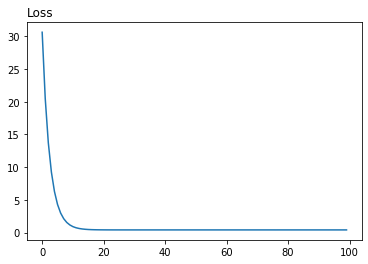

In [10]:
h_loss, h_mse = history.history['loss'], history.history['mse']

plt.plot(h_loss)
plt.title('Loss', loc='left')
plt.show()

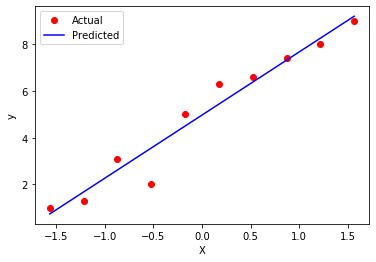

In [11]:
plt.plot(X_train_norm, y_train, 'ro')
plt.plot(X_train_norm, lm.predict(X_train_norm), 'b-')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Actual', 'Predicted'])
plt.show()

## Classification with MNIST
#### Still using the MNIST data, but sourcing it from Keras, it is stored in a slightly different format, but its the same data as in the scikit-learn example.

In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
# 28 x 28 = 784

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Single Layer (aka `Logistic Regression`)
We will sequentially add layers to the model.  
- Input layer specifies the incoming data, i.e., the pixels.  
- The next layer specifies the layers, which includes the number of units and the activation function.  
- The final layer is the output layer, which is a `softmax` activation function since this is a multiclass problem.

In [40]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(num_classes, activation="softmax", name="Softmax")
    ], name='Logistic'
)
model.summary()

Model: "Logistic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Loss Functions for Neural Networks

- Sigmoid or softmax are the output layers (binary/multiclass) which output class probabilities.  
- Without them, you'd output logits.  
- Cross-entropy (binary/categorical) is the loss, but need to specify it dependent on your output:

<img src='diagrams/14_11_loss.png'>

Elapsed time: 0:00:11.873336


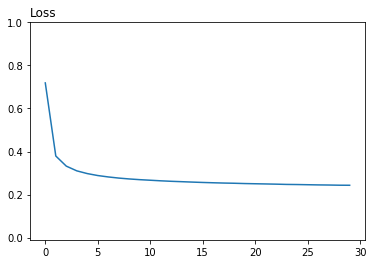

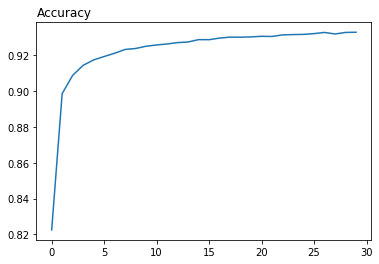

In [41]:
import datetime

batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

st = datetime.datetime.now()

history = model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1, verbose=0)

en = datetime.datetime.now()
el = en - st

print(f'Elapsed time: {el}')

plt.plot(history.history['loss'])
plt.title('Loss', loc='left')
plt.ylim((0, 1))
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy', loc='left')
plt.ylim((0.7, 1))
plt.show()

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.263
Test accuracy: 0.927


### Multiple Hidden Layers

In [43]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(50, activation="relu", name="Hidden"),
        layers.Dense(50, activation="relu", name="Second"),
        layers.Dense(num_classes, activation="softmax", name='Output'),
    ], name='2_Hidden_Layers'
)
model.summary()

Model: "2_Hidden_Layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden (Dense)               (None, 50)                39250     
_________________________________________________________________
Second (Dense)               (None, 50)                2550      
_________________________________________________________________
Output (Dense)               (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


> `Need to learn 42,310 parameters!`

Potential issues:
- Vanishing gradients - they'll get smaller as the number of layers increase. May cause convergence issues.  
- In rarer cases, the gradients may increase and explode towards infinity.  
- Using ReLU makes these rarer; sigmoid is much more suspectible.  
    - It is possible for ReLU to only output `0` and many of the neurons will `die`. Leaky ReLU, $\phi(z)=max(\alpha z, z)$ guards against this issue.

> Sometimes you will need to normalize the output of the layer prior to moving it into the next layer, which is called `batch normalization`. It zero-centers and normalizes the outputs.

```python
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(50, activation="relu", name="Hidden"),
        layers.BatchNormalization(),
        layers.Dense(50, activation="relu", name="Second"),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax", name='Output'),
    ], name='2-Hidden Layers'
)
```

Unfortunately, `BatchNormalization` has additional hyperparameters.

Elapsed time: 0:00:15.035827


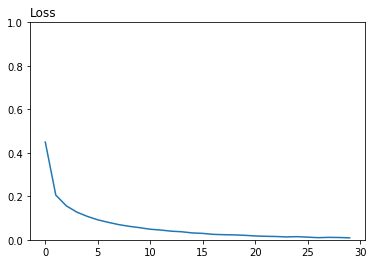

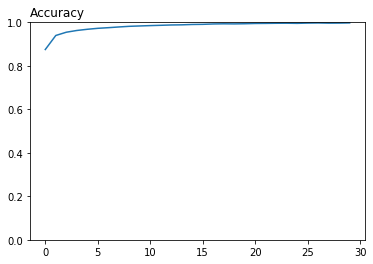

In [44]:
import datetime

batch_size = 128
epochs = 30

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

st = datetime.datetime.now()

history = model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1, verbose=0)

en = datetime.datetime.now()

el = en - st
print(f'Elapsed time: {el}')

plt.plot(history.history['loss'])
plt.title('Loss', loc='left')
plt.ylim((0,1))
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy', loc='left')
plt.ylim((0,1))
plt.show()

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.128
Test accuracy: 0.974


## Regularizing
- Each layer has support for $l_2$ or $l_1$ regularization. See [the documentation](https://keras.io/api/layers/regularizers/).  
- Can also use `dropout`, which means we will drop a neuron with probability $p$ during a training step.  
    - Usually works better for earlier layers.  
    - Like $l_1$ and $l_2$, try if the model is overfitting.
  
#### Before
<img src='files/diagrams/holdout-before.png' style='height: 300px'>

#### After
<img src='files/diagrams/holdout-after.png' style='height: 300px'>


Example code:
```python
    keras.layers.Dropout(rate=0.2)
```

- If `dropout` after each layer is causing underfitting, try using with last layer only.  

Elapsed time: 0:00:24.709013


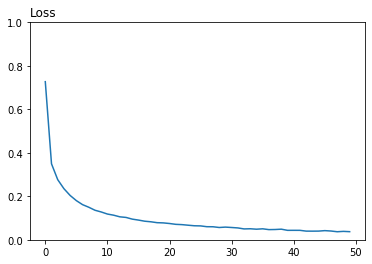

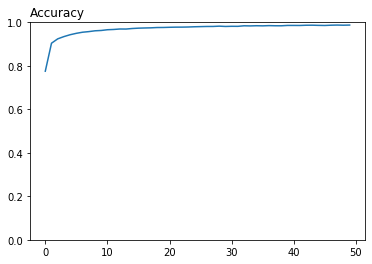

In [51]:
import datetime

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(50, activation="relu", name="Hidden"),
        layers.Dense(50, activation="relu", name="Second"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax", name='Output'),
    ], name='2_Hidden_Layers'
)

batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

st = datetime.datetime.now()

history = model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1, verbose=0)

en = datetime.datetime.now()

el = en - st
print(f'Elapsed time: {el}')

plt.plot(history.history['loss'])
plt.title('Loss', loc='left')
plt.ylim((0,1))
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy', loc='left')
plt.ylim((0,1))
plt.show()

In [52]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {score[0]:.3f}')
print(f'Test accuracy: {score[1]:.3f}')

Test loss: 0.158
Test accuracy: 0.971


# Nonsequential Networks (Wide & Deep)
Allows for learning simple and deep rules.

- [Example on Keras's website](https://keras.io/examples/structured_data/wide_deep_cross_networks/)  
- [Wide and Deep for Recommendation Systems](https://arxiv.org/abs/1606.07792)  
- [Google Article on Wide & Deep](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html)

<img src='diagrams/wide_deep.png' style='width: 900px'>

[Image Source: Google AI Blog: Wide & Deep Learning: Better Together](https://ai.googleblog.com/2016/06/wide-deep-learning-better-together-with.html)



### Wide & Deep on California Housing Data (Regression)
Pages 307-310, Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
housing.data.shape

(20640, 8)

#### Split into training, validation, test

In [2]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size = 0.20)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20)

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Validation examples: {X_val.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Training examples: 13,209
Validation examples: 3,303
Test examples: 4,128


#### Standardize - rules determined on training and applied to validation and test data

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_tes = scaler.transform(X_test)

#### Wide & Deep Model

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

input_  = layers.Input(shape=X_train.shape[1:])
hidden1 = layers.Dense(30, activation="relu")(input_)
hidden2 = layers.Dense(30, activation="relu")(hidden1)
hidden3 = layers.Dense(30, activation="relu")(hidden2)
concat  = layers.Concatenate()([input_, hidden3])
output  = layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 30)           930         dense_1[0][0]                    
______________________________________________________________________________________________

> Input funnels to 1st, 2nd, and 3rd Hidden Layer; then is concatenated back with the input.

Elapsed time: 0:00:10.657027


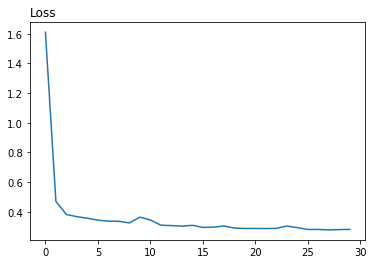

In [5]:
import datetime

model.compile(loss='mse', optimizer='adam')

st = datetime.datetime.now()

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), verbose=0)

en = datetime.datetime.now()
el = en-st

print(f'Elapsed time: {el}')
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['loss'])
plt.title('Loss', loc='left')
plt.show()

> Different inputs can be used for the simple and shallow rules.  

> You can also have multiple outputs.

### Saving and loading Models

In [27]:
model.save('california-housing.h5')

import os
print(*os.listdir(), sep='\n')

neural-networks-recurrent.ipynb
.DS_Store
diagrams
neural-networks-convolutions.ipynb
.ipynb_checkpoints
neural-networks.ipynb
data
california-housing.h5


In [28]:
model = keras.models.load_model('california-housing.h5')
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           930         dense_4[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
____________________________________________________________________________________________

> Really long training can use callbacks/check-points to save your models periodically.

## Tuning Parameters
- The amount of hyperparameters and architecture options making tuning difficult and time consuming.  
- Simple forward-feed model will have:
    - number of layers. 
    - number of neurons per layer.  
    - type of activation function per layer.  
    - initialization logic.  
    - learning rate.  
    - ...
- Can use scikit-learn's grid search to make some of this easier.  
- You can use inspect part of a space, see if it looks promising and explore around it.  
- Packages that can help:  
    - Hyperopt  
    - Hyperas  
    - Keras Tuner  
    - Scikit-Optimize  
    - Spearmint  
    - Sklearn-Deep
    - Google Cloud has also options for tuning.  
    
[Paper on Uber's Evolutionary Approach](https://eng.uber.com/deep-neuroevolution/)

In [6]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    '''
    Source page 320, Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow
    '''
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

### Using Randomized Search

In [11]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import datetime

params = {
    'n_hidden': (1, 2),
    'n_neurons': (1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20)
}

st = datetime.datetime.now()
rnd_search_cv = RandomizedSearchCV(keras_reg, params, n_iter=5, cv=3)
rnd_search_cv = rnd_search_cv.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=0)

en = datetime.datetime.now()
el = en - st
print(f'Elapsed time: {el}')

4403/4403 [==============================] - 0s 14us/sample - loss: 0.3845
Elapsed time: 0:03:10.846895


In [16]:
rnd_search_cv.best_params_

{'n_neurons': 20, 'n_hidden': 2}

## Additional Types of Advanced Neural Networks
- [Convolutional Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks)  
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder)  
- [Recurrent Neural Networks](https://en.wikipedia.org/wiki/Recurrent_neural_network)  
- [Generative Adversarial Networks](https://en.wikipedia.org/wiki/Generative_adversarial_network) 
- [Graph Neural Networks](https://arxiv.org/pdf/1812.08434.pdf)  
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder)  